In [72]:
#84.51 after using GridSearchCV RandomForests

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Study\ML\CSV\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X=df.drop('target',axis=1)
y=df['target']

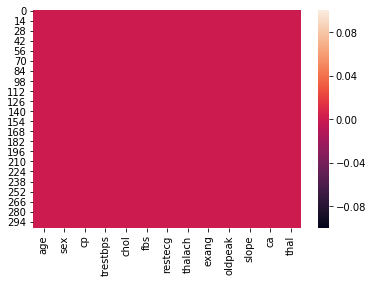

In [5]:
sns.heatmap(X.isnull())

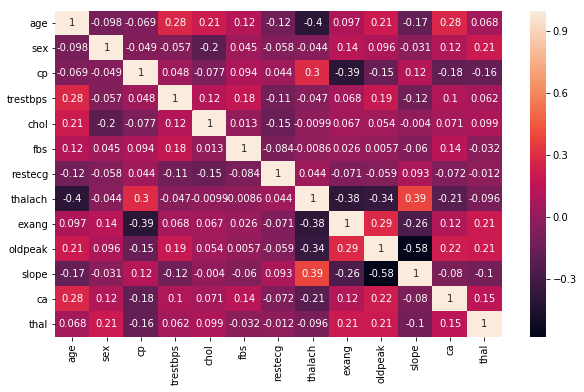

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True)

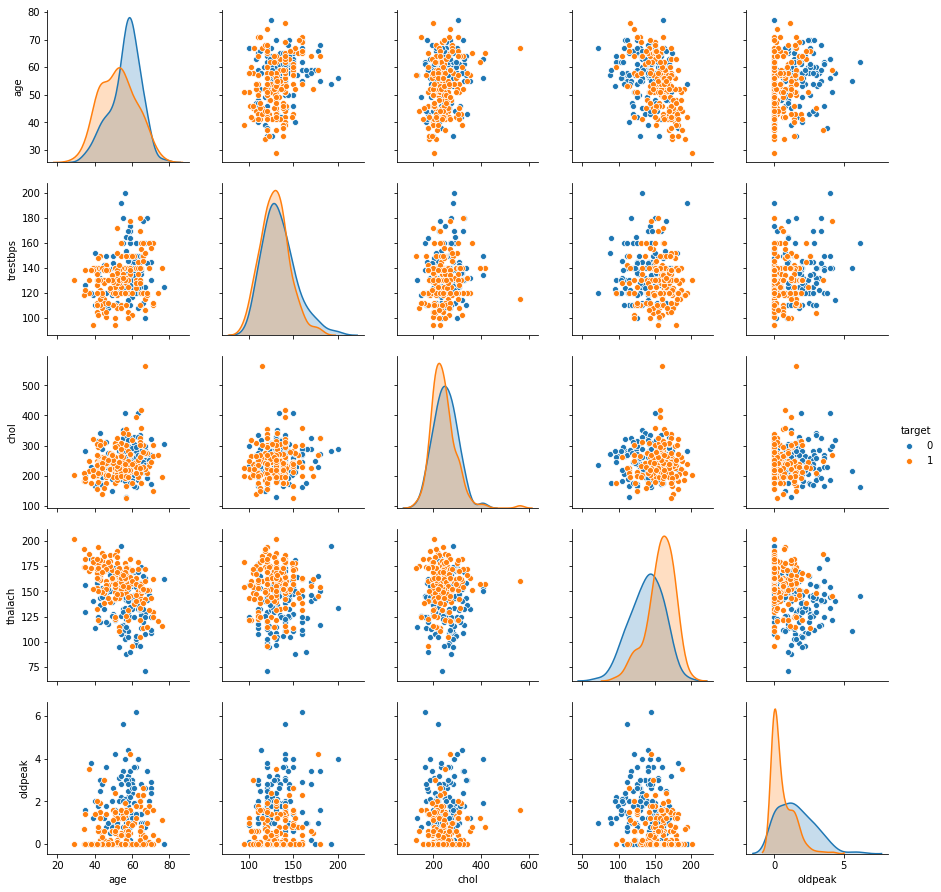

In [14]:
sns.pairplot(df,x_vars=['age','trestbps','chol','thalach','oldpeak'],y_vars=['age','trestbps','chol','thalach','oldpeak'],
             hue='target')

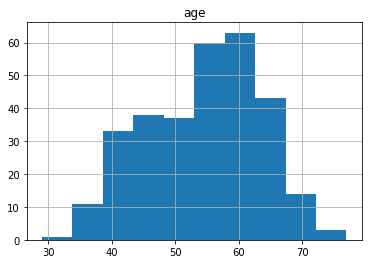

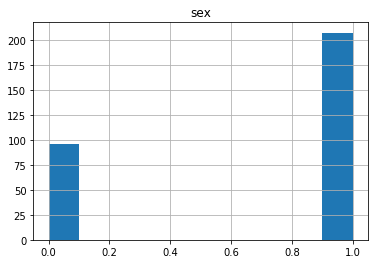

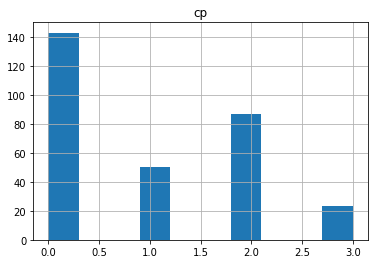

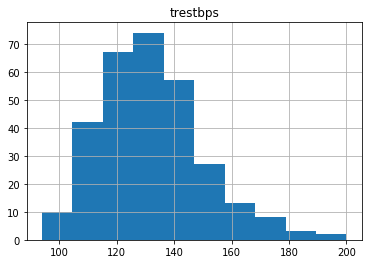

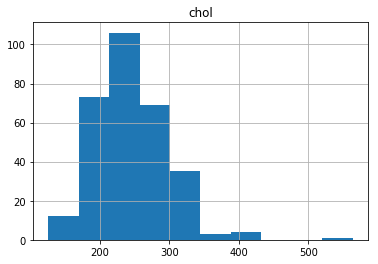

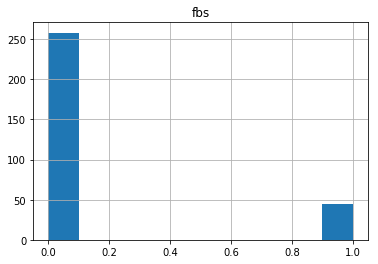

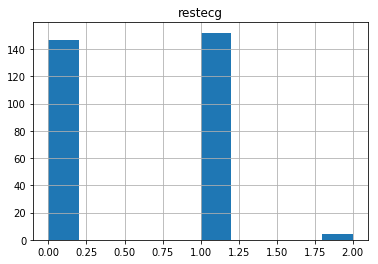

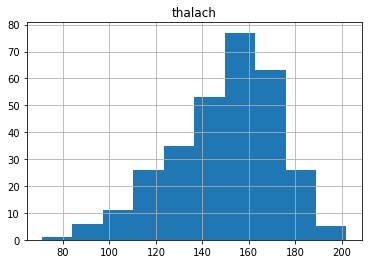

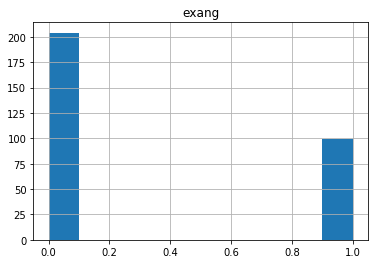

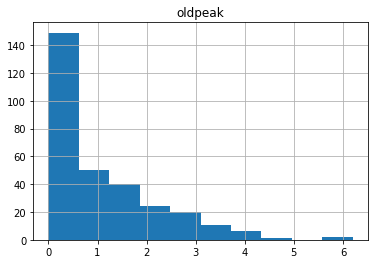

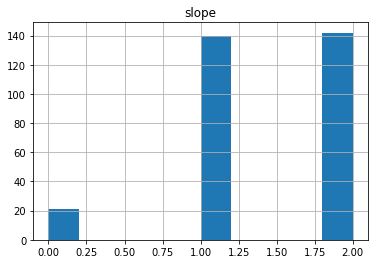

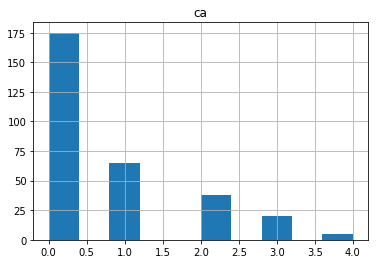

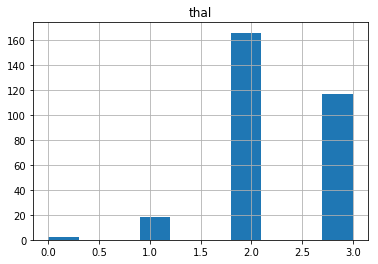

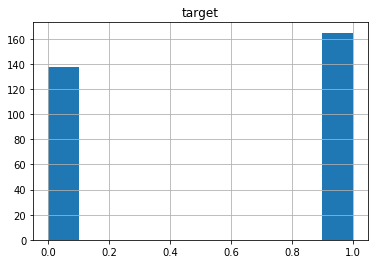

In [14]:
for c in df:

    df.hist(column=c)

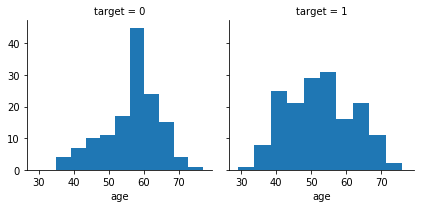

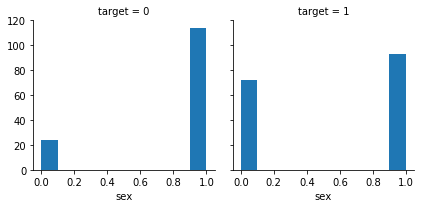

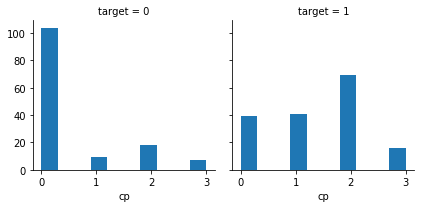

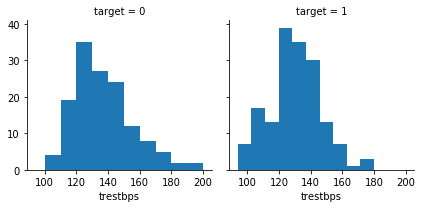

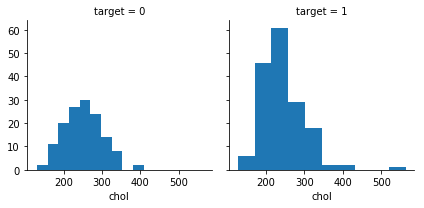

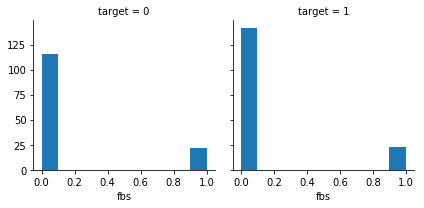

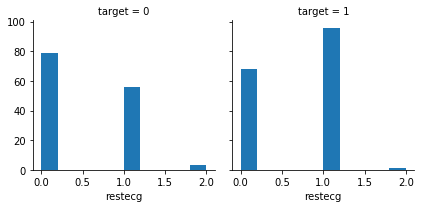

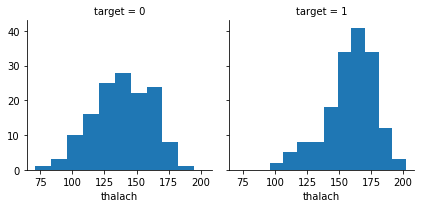

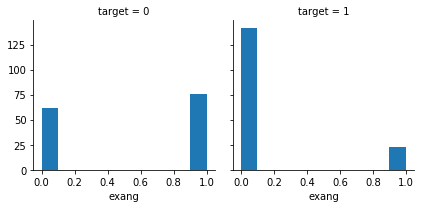

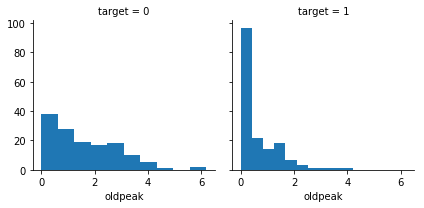

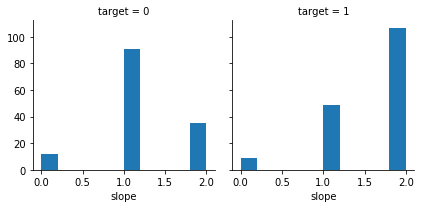

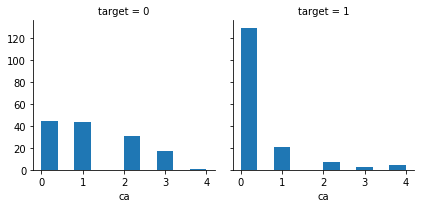

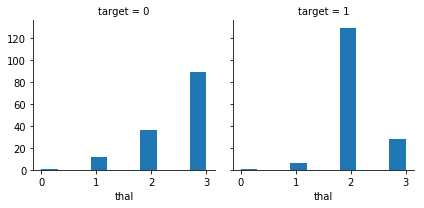

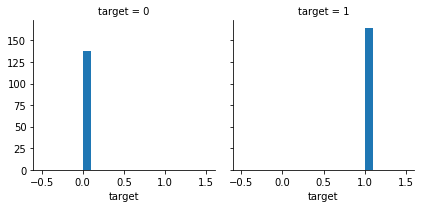

In [16]:
for c in df:
    g=sns.FacetGrid(df,col='target')
    g.map(plt.hist,c)

In [17]:
df.shape

(303, 14)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [19]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
model_name=['LogReg','DTree','RF','KNN','SVC']
acc=[]
d={}

In [20]:
X=df.drop('target',axis=1)
y=df['target']


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [23]:
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    clf=model[i]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
d={'Model':model_name,'Score':acc}
score=pd.DataFrame(d)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
score

,Model,Score
0,LogReg,0.855263
1,DTree,0.815789
2,RF,0.802632
3,KNN,0.644737
4,SVC,0.513158


In [25]:
#using standardized data

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=StandardScaler()
mx=MinMaxScaler()

In [44]:
x0=mx.fit_transform(X)
#x0=scaler.transform(X)
X=pd.DataFrame(x0,columns=X.columns)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [49]:
acc=[]
d={}
df=pd.read_csv(r'D:\Study\ML\CSV\heart.csv')
X=df.drop('target',axis=1)
y=df['target']
x0=mx.fit_transform(X)
#x0=scaler.transform(X)
X=pd.DataFrame(x0,columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    clf=model[i]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
d={'Model':model_name,'Score':acc}
score=pd.DataFrame(d)
score

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Model,Score
0,LogReg,0.835165
1,DTree,0.791209
2,RF,0.835165
3,KNN,0.802198
4,SVC,0.813187


In [50]:
%timeit
model=RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=1,
                             random_state=1)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [51]:
from sklearn.model_selection import GridSearchCV

In [60]:
param={'n_estimators':[200,400,600,800,1000,1200],'max_features':['auto','sqrt'],'max_depth':[3,4,5,6,7]}

In [61]:
rf=RandomForestClassifier()

In [63]:
#rf.estimator_params

In [64]:
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
pred=grid.predict(X_test)
accuracy_score(pred,y_test)

0.8461538461538461

In [66]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
grid.best_score_

0.8349056603773585

In [69]:
param={'n_estimators':[200,400,600,800,1000,1200],'max_features':['auto','sqrt'],'max_depth':[3,4,5,6,7],
      'min_samples_leaf':[50,70,90,110]}

In [70]:
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [50, 70, 90, 110]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
pred=grid.predict(X_test)
accuracy_score(pred,y_test)

0.8351648351648352

In [74]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)